In [10]:
import torch
import torch.nn as nn
import torchvision.datasets as dset
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

training_epochs = 15 # training 반복 횟수
batch_size = 100

# 이미지 변환 함수 정의
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

mnist_train = dset.MNIST(root='./data', train=True, transform=transform, download=True)
mnist_test = dset.MNIST(root='./data', train=False, transform=transform, download=True)

train_loader = torch.utils.data.DataLoader(mnist_train, batch_size = 64, shuffle=True, drop_last=True)
test_loader = torch.utils.data.DataLoader(mnist_test, batch_size = 64, shuffle=True, drop_last=True)


In [11]:
# MNIST 입력의 크기는 28 x 28 = 784
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
linear = torch.nn.Linear(784, 10, bias=True).to(device)
torch.nn.init.uniform_(linear.weight) # 균일 분포(a,b)로 텐서를 초기화

Parameter containing:
tensor([[0.3848, 0.5516, 0.5156,  ..., 0.0846, 0.1935, 0.0282],
        [0.9449, 0.1030, 0.7370,  ..., 0.3680, 0.2268, 0.4409],
        [0.3842, 0.0993, 0.3008,  ..., 0.9947, 0.9022, 0.9382],
        ...,
        [0.0257, 0.8938, 0.9515,  ..., 0.5931, 0.2517, 0.3112],
        [0.8410, 0.6488, 0.0865,  ..., 0.0537, 0.3959, 0.1059],
        [0.0289, 0.5815, 0.5073,  ..., 0.1356, 0.3255, 0.7254]],
       requires_grad=True)

In [12]:
# Loss fn - Cross Entropy Loss(비용 함수, 내부적으로 소프트맥스 함수를 포함)
criterion = torch.nn.CrossEntropyLoss().to(device)
# optimizer - SGD(옵티마이저)
optimizer = torch.optim.SGD(linear.parameters(), lr = 0.1)

In [ ]:
for epoch in range(training_epochs):
  for i, (imgs, labels) in enumerate(train_loader):
    imgs, labels = imgs.to(device), labels.to(device)
    imgs = imgs.view(-1, 28 * 28)

    outputs = linear(imgs)
    loss = criterion(outputs, labels)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    _, argmax = torch.max(outputs, 1)
    accuracy = (labels == argmax).float().mean()

    if(i+1) % 100 == 0:
      print(f'Epoch [{epoch+1}/{training_epochs}], Step [{i+1}/{len(train_loader)}], Loss: {loss.item():.4f}, Accuracy: {accuracy.item() * 100:.2f}')

In [16]:
linear.eval()
with torch.no_grad():
  correct = 0
  total = 0
  for i, (imgs, labels) in enumerate(test_loader):
    imgs, labels = imgs.to(device), labels.to(device)
    imgs = imgs.view(-1, 28 * 28)
    outputs = linear(imgs)
    _, argmax = torch.max(outputs, 1)
    total += imgs.size(0)
    correct += (labels == argmax).sum().item()

  print('Test accuracy for {} images: {: .2f}%'.format(total, correct / total * 100))

Test accuracy for 9984 images:  91.12%


Label:  1
Prediction:  1


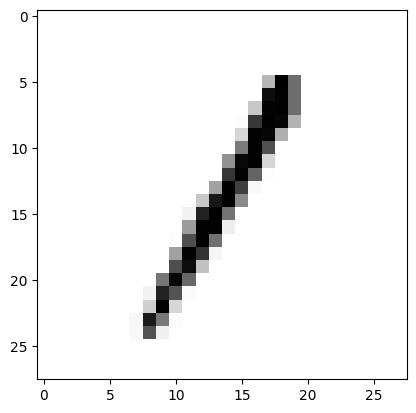

In [25]:
import matplotlib.pyplot as plt
import random

r = random.randint(0, len(mnist_test) - 1)
X_single_data = mnist_test.test_data[r : r + 1].view(-1, 28 * 28).float().to(device)
Y_single_data = mnist_test.test_labels[r: r + 1].to(device)

print("Label: ", Y_single_data.item())
single_prediction = linear(X_single_data)
print("Prediction: ", torch.argmax(single_prediction, 1).item())

plt.imshow(mnist_test.test_data[r:r+1].view(28,28), cmap="Greys", interpolation="nearest")
plt.show()